In [2]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [3]:
!ls "content/MyDrive"

 31b1b994-71ce-4bc5-aace-977020c06ad1.JPG
 32a9e3aa-77a3-4d6f-b2a2-1c3e87d6d703.JPG
'8d927ead-c91f-46c0-99ef-b34f6acfaa62 (1).JPG'
 8d927ead-c91f-46c0-99ef-b34f6acfaa62.JPG
 BackUp
'Colab Notebooks'
'Dance Videos'
 DANCIIAFIT
'Data Science'
'Deep Learning'
 IBK
'Masters(IT Related)  Student Review.gform'
 Me
'Moist Beach'
'Mummy’s Funeral'
'Mummy’s HBD'
'My Queen'
'OLUTAYO-OLADEINBO+-+RESUME+2 (1) (1).pdf'
'OLUTAYO-OLADEINBO+-+RESUME+2 (1).pdf'
'Olutayo Oladeinbo Updated 1.docx'
 Personal
'Personal Data'
 Resume.gdoc
'School Work'
 Softwares
 Tolu
'Untitled document.gdoc'
'Untitled form (1).gform'
'Untitled form.gform'
'Untitled spreadsheet.gsheet'


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [5]:
BATCH_SIZE = 64
IMAGE_SIZE = 128
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/content/MyDrive/Data Science/Data Science/SKIN DISEASE CLASSIFICATION/IMG_CLASSES/",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)
# test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     "/content/content/MyDrive/Data Science/Data Science/SKIN DISEASE CLASSIFICATION/IMG_CLASSES/",
#     shuffle = True,
#     image_size = (IMAGE_SIZE,IMAGE_SIZE),
#     batch_size = BATCH_SIZE  
# )

Found 27193 files belonging to 10 classes.


In [6]:
# Get Labels
class_names = train_dataset.class_names
class_names

['Atopic Dermatitis',
 'Basal Cell Carcinoma (BCC)',
 'Benign Keratosis-like Lesions (BKL)',
 'Eczema',
 'Melanocytic Nevi (NV)',
 'Melanoma',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Seborrheic Keratoses and other Benign Tumors',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Warts Molluscum and other Viral Infections']

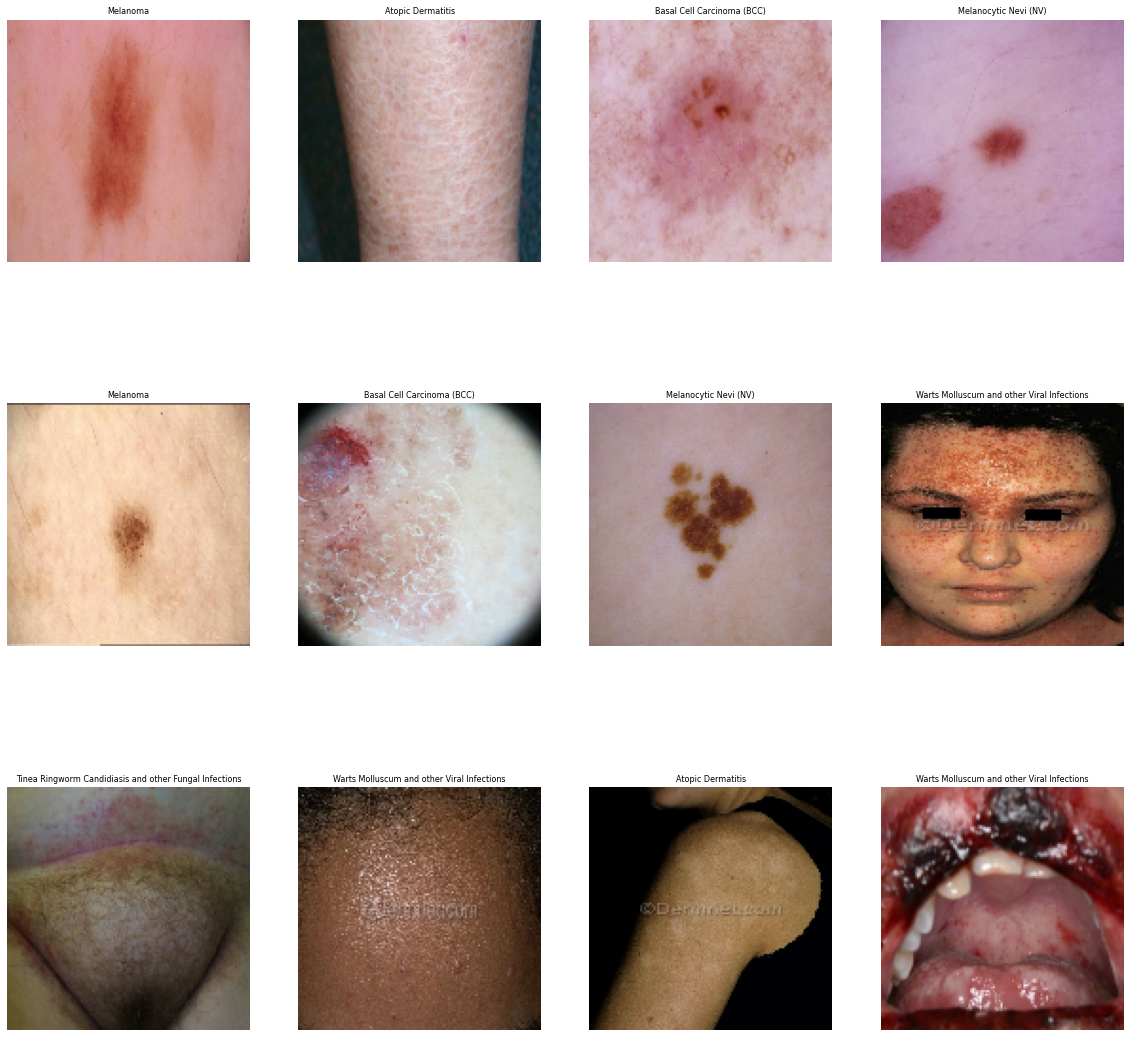

In [7]:
plt.figure(figsize = (20,20))
for image_batch, label_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]],fontsize=8)
        plt.axis("off")

In [8]:
def split_dataset_partitions(dataset,train_split=0.8,val_split=0.2,shuffle=True,shuffle_size=10000):
    assert(train_split+val_split) == 1
    dataset_size = len(dataset)
    if shuffle:
        dataset = dataset.shuffle(shuffle_size,seed=12)
        train_size = int(train_split*dataset_size)
        val_size = int(val_split * dataset_size)
        
        train_ds = dataset.take(train_size)
        val_dataset = dataset.skip(train_size).take(val_size)
        return train_ds, val_dataset

In [9]:
train_ds, val_ds = split_dataset_partitions(train_dataset)

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
from keras.applications.vgg16 import VGG16

In [12]:
# Initialize the Pretrained Model, VGG16
feature_extractor = VGG16(input_shape=(224,224,3),include_top=False)
# Set this parameter to make sure the model is not being trained
feature_extractor.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [13]:
resize_and_rescale = tf.keras.Sequential([
                     keras.layers.experimental.preprocessing.Resizing(224,224),
                     keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
                     keras.layers.experimental.preprocessing.RandomZoom(0.2),
                     keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
model = keras.Sequential([             
                              resize_and_rescale,
                              data_augmentation,
                              feature_extractor,
                              keras.layers.Flatten(),
                              keras.layers.Dense(128, activation='relu'),
                              keras.layers.Dense(250, activation='relu'),
                              keras.layers.Dense(100, activation='relu'),
                              keras.layers.Dense(10,activation='softmax')
])

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs = 100,batch_size = 30,validation_data = val_ds) 

Epoch 1/100
340/340 [==============================] - 1793s 688ms/step - loss: 1.4436 - accuracy: 0.4473 - val_loss: 1.2609 - val_accuracy: 0.4842
Epoch 2/100
340/340 [==============================] - 242s 713ms/step - loss: 1.2444 - accuracy: 0.5155 - val_loss: 1.2616 - val_accuracy: 0.5040
Epoch 3/100
340/340 [==============================] - 226s 666ms/step - loss: 1.1671 - accuracy: 0.5438 - val_loss: 1.0737 - val_accuracy: 0.5901
Epoch 4/100
340/340 [==============================] - 226s 664ms/step - loss: 1.1275 - accuracy: 0.5625 - val_loss: 1.3205 - val_accuracy: 0.5107
Epoch 5/100
340/340 [==============================] - 225s 663ms/step - loss: 1.0973 - accuracy: 0.5744 - val_loss: 1.1740 - val_accuracy: 0.5555
Epoch 6/100
340/340 [==============================] - 225s 663ms/step - loss: 1.0784 - accuracy: 0.5886 - val_loss: 1.1191 - val_accuracy: 0.5741
Epoch 7/100
340/340 [==============================] - 226s 664ms/step - loss: 1.0660 - accuracy: 0.5889 - val_loss: 

In [ ]:
y_predicted = model.predict(val_ds)
y_predicted

array([[1.0935227e-06, 7.4226268e-06, 2.4501902e-05, ..., 1.1946376e-05,
        2.2548929e-07, 2.7815042e-07],
       [1.2243673e-06, 7.3286450e-01, 2.6663104e-01, ..., 4.7112248e-06,
        1.9077613e-06, 2.0109893e-04],
       [2.2092331e-02, 3.9027606e-10, 4.8364722e-08, ..., 3.3736680e-02,
        1.7865001e-01, 2.1162149e-01],
       ...,
       [2.1562637e-07, 7.2407874e-04, 2.2854200e-02, ..., 2.1117467e-05,
        5.8347933e-08, 8.9813784e-06],
       [1.7302741e-01, 1.2518154e-09, 1.2128262e-10, ..., 2.9595469e-05,
        7.8364499e-02, 1.3195481e-03],
       [6.6749672e-05, 6.5339111e-07, 3.5938999e-04, ..., 7.1905601e-01,
        1.4718121e-04, 6.1639142e-04]], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[5, 1, 6, 4, 8]

In [ ]:
model.evaluate(val_ds)

85/85 [==============================] - 85s 143ms/step - loss: 0.8955 - accuracy: 0.6855


[0.8954606056213379, 0.6854779124259949]

In [ ]:
val_ds

<TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

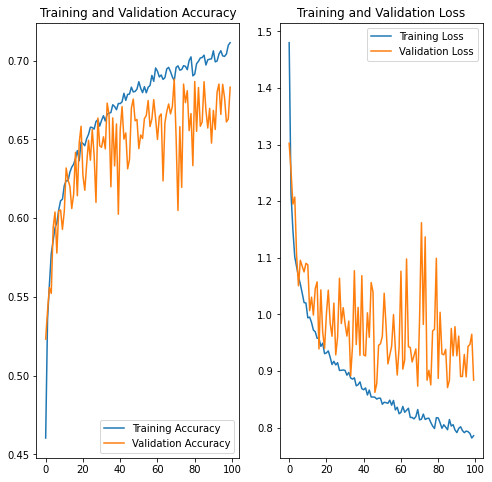

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
class_names
class_names_no = []
num = 0
for i in class_names:
    class_names_no.append(num)
    num +=1
class_names_no

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 17,927,370
Trainable params: 3,212,682
N

In [ ]:
model.save("/content/content/MyDrive/Data Science/Data Science/SKIN DISEASE CLASSIFICATION/model2.h5")
print("Saved model to disk")

Saved model to disk
